In [2]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
df= pd.DataFrame(data_dict)
POI_count = 0
name_list = data_dict.keys()
for person in name_list:
    POI_count += data_dict[person]['poi']    
print('Number of flagged Persons of Interest: %d' % POI_count)
print('Number of people without POI flag: %d' % (len(name_list) - POI_count))

Number of flagged Persons of Interest: 18
Number of people without POI flag: 128


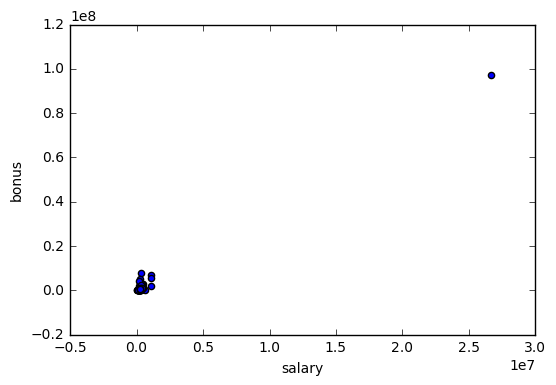

In [3]:
%matplotlib inline
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [4]:
### Task 2: Remove outliers
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features_list) 

### remove NAN's from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
### print top 4 salaries
print outliers_final

for name in outliers_final:
    if data_dict[name[0]]['poi'] ==1:
        print name[0]
        
import csv
df.to_csv('enron_data.csv')


[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]
SKILLING JEFFREY K
LAY KENNETH L


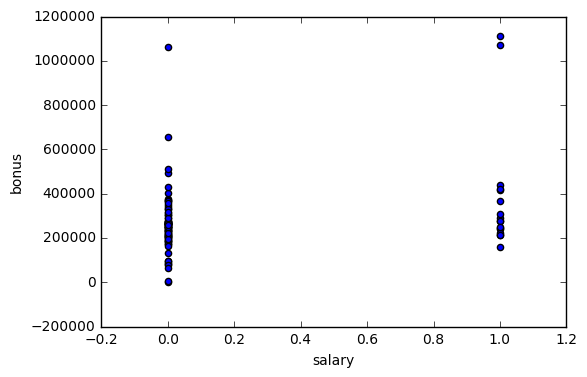

In [5]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")

In [6]:
print('Number of flagged Persons of Interest: %d' % len(my_dataset['SKILLING JEFFREY K'].keys()))

Number of flagged Persons of Interest: 21


In [7]:
def get_total_list(key1, key2):
    'combine 2 lists in one, assign NaN to 0'
    new_list = []
    for i in data_dict:
        # assign NaN to 0
        if data_dict[i][key1] == 'NaN' or data_dict[i][key2] == 'NaN':
            new_list.append(0.)
        elif data_dict[i][key1]>=0:
            new_list.append(float(data_dict[i][key1]) + float(data_dict[i][key2]))
    return new_list

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'direct

In [8]:
my_features = features_list + [
'shared_receipt_with_poi',
'expenses',
'loan_advances',
'long_term_incentive',
'other',
 'restricted_stock',
'restricted_stock_deferred',
'deferral_payments',
 'deferred_income',
'salary',
'total_stock_value',
'exercised_stock_options',
'total_payments',
'bonus']

data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

k_best = SelectKBest(k=5)
k_best.fit(features, labels)

results_list = zip(k_best.get_support(), my_features[1:], k_best.scores_)
results_list = sorted(results_list, key=lambda x: x[2], reverse=True)
print "K-best features:", results_list

## 5 best features chosen by SelectKBest
my_features = features_list + ['exercised_stock_options',
'total_stock_value',
'bonus',
 'salary',
'fraction_to_poi']

data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

K-best features: [(True, 'exercised_stock_options', 25.097541528735491), (True, 'total_stock_value', 24.467654047526391), (True, 'bonus', 21.060001707536578), (True, 'salary', 18.575703268041778), (True, 'salary', 18.575703268041778), (False, 'deferred_income', 11.595547659732164), (False, 'long_term_incentive', 10.072454529369448), (False, 'restricted_stock', 9.3467007910514379), (False, 'total_payments', 8.8667215371077805), (False, 'shared_receipt_with_poi', 8.7464855321290802), (False, 'loan_advances', 7.2427303965360172), (False, 'expenses', 6.234201140506757), (False, 'other', 4.2049708583014187), (False, 'deferral_payments', 0.21705893033950563), (False, 'restricted_stock_deferred', 0.064984311723709831)]
error: key  fraction_to_poi  not present


TypeError: 'NoneType' object is not iterable

In [10]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()



In [1]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'features' is not defined

In [ ]:
ref: https://www.kaggle.com/forums/f/15/kaggle-forum/t/12611/methodological-ml-dispute-with-a-udacity-teacher-could-you-help-me-understanding
        http://scikit-learn.org/stable/modules/feature_selection.html
            
        